In [43]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [45]:
df=pd.read_csv("datasets/heart.csv")
value = ['age', 'anaemia', 'creatinine_phosphokinase',
         'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
         'sex', 'smoking', 'time', 'DEATH_EVENT']
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [46]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                
df=df.apply(string_to_int.fit_transform) 
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,34,0,144,0,3,1,93,17,9,1,0,0,1
1,15,0,207,0,7,0,91,7,15,1,0,1,1
2,26,0,66,0,3,0,26,10,8,1,1,2,1
3,10,1,44,0,3,0,49,17,16,1,0,2,1
4,26,1,74,1,3,0,133,24,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,23,0,12,1,7,1,24,7,22,1,1,143,0
295,15,0,186,0,7,0,97,9,18,0,0,144,0
296,5,0,191,1,12,0,174,4,17,0,0,145,0
297,5,0,195,0,7,0,17,11,19,1,1,146,0


In [48]:
feature_cols = ['age', 'anaemia', 'creatinine_phosphokinase',
                'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
                'sex', 'smoking', 'time', 'DEATH_EVENT']
X = df[feature_cols]                        
y = df.DEATH_EVENT   

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [50]:
from sklearn.tree import DecisionTreeClassifier                            
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)   
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [51]:
y_pred= classifier.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [53]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
144,1,1
152,0,0
156,0,0
83,0,0
11,1,1
...,...,...
132,0,0
191,0,0
9,1,1
162,0,0


In [54]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[62  0]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        28

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [55]:
import graphviz 

In [56]:
from sklearn.tree import export_graphviz

In [57]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

In [58]:
import pydotplus

In [59]:
from IPython.display import Image

In [60]:
dot_data = StringIO()

In [61]:
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names=value,class_names=['0','1'])

In [62]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

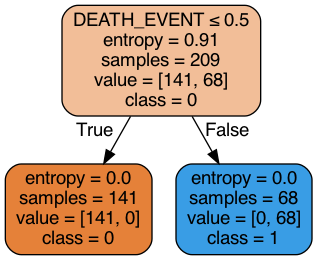

In [63]:
Image(graph.create_png())